In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

sns.set_theme(rc={'figure.figsize':(16, 10)})

spots_data_1 = pd.read_csv(Path("..", "DATA", "results", "spots_Merged-1.csv"), skiprows=[1,2,3])
spots_data_2 = pd.read_csv(Path("..", "DATA", "results", "spots_Merged-2.csv"), skiprows=[1,2,3])
spots_data_3 = pd.read_csv(Path("..", "DATA", "results", "spots_Merged-3.csv"), skiprows=[1,2,3])
tracks_data_1 = pd.read_csv(Path("..", "DATA", "results", "tracks_with_colonylabels_Merged-1.csv"))
tracks_data_2 = pd.read_csv(Path("..", "DATA", "results", "tracks_with_colonylabels_Merged-2.csv"))
tracks_data_3 = pd.read_csv(Path("..", "DATA", "results", "tracks_with_colonylabels_Merged-3.csv"))
tracks_stats_1 = pd.read_csv(Path("..", "DATA", "results", "track_stats_Merged-1.csv"))
tracks_stats_2 = pd.read_csv(Path("..", "DATA", "results", "track_stats_Merged-2.csv"))
tracks_stats_3 = pd.read_csv(Path("..", "DATA", "results", "track_stats_Merged-3.csv"))

In [2]:
def plotcolony(data, feature):
    ax = sns.boxplot(data, x="COLONY_LABEL", y=feature)

    medians = data.groupby(["COLONY_LABEL"])[feature].median().values
    nobs = data["COLONY_LABEL"].sort_values().value_counts().sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    
    # Add it to the plot
    pos = range(len(nobs))
    for tick, label in enumerate(ax.get_xticklabels()):
        ax.text(pos[tick],
                medians[tick],
                nobs[tick],
                horizontalalignment='center',
                size='x-small',
                color='w',
                weight='semibold')
    
    return ax
 

In [3]:
spots_data_1["IMAGE_ID"] = '1'
spots_data_2["IMAGE_ID"] = '2'
spots_data_3["IMAGE_ID"] = '3'
tracks_data_1["IMAGE_ID"] = '1'
tracks_data_2["IMAGE_ID"] = '2'
tracks_data_3["IMAGE_ID"] = '3'

In [4]:
all_tracks = pd.concat((tracks_data_1, tracks_data_2, tracks_data_3))

In [5]:
all_tracks_pivot = all_tracks.melt(id_vars=["IMAGE_ID", "COLONY_LABEL"], value_vars=["TRACK_DURATION", "TRACK_DISPLACEMENT", "TRACK_MEAN_SPEED", "TOTAL_DISTANCE_TRAVELED", "CONFINEMENT_RATIO", "MEAN_DIRECTIONAL_CHANGE_RATE"])

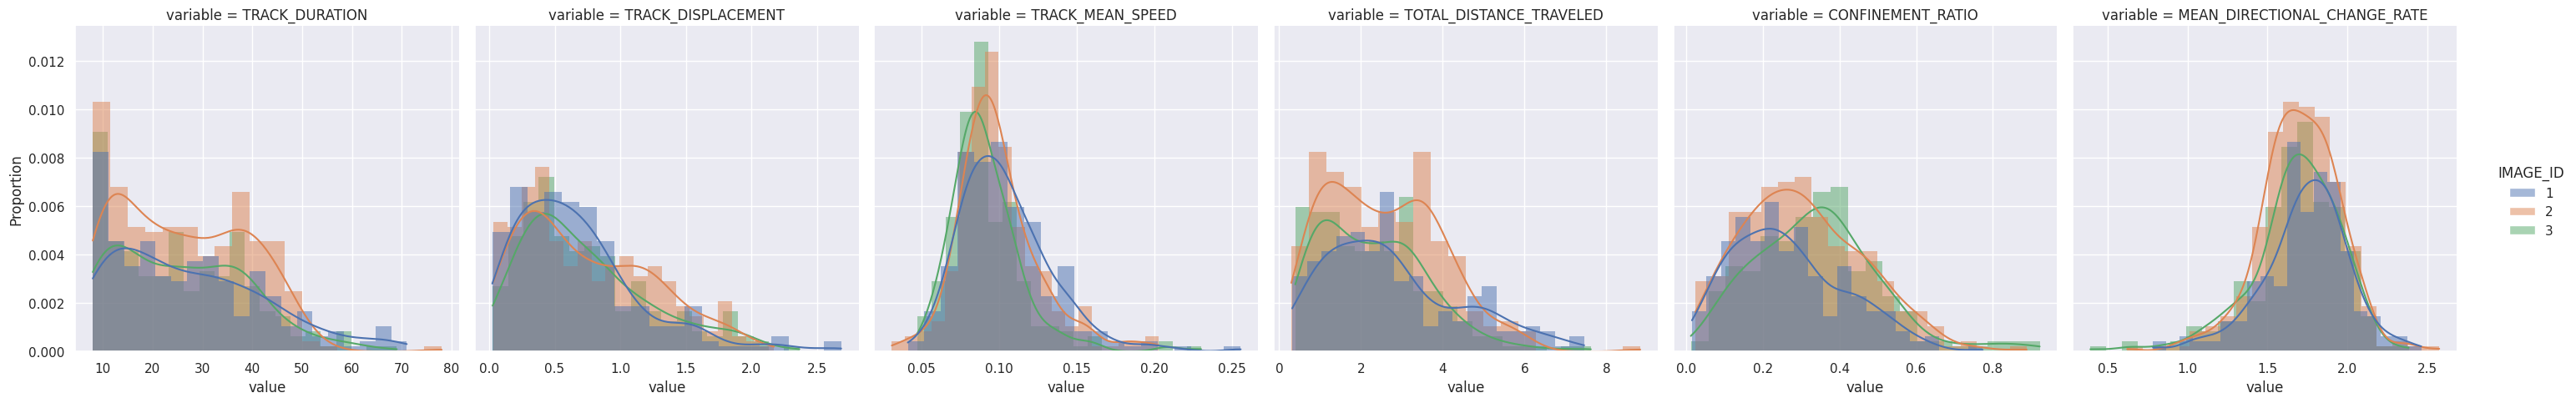

In [6]:
sns.displot(all_tracks_pivot, x="value", hue="IMAGE_ID", kde=True, common_bins=False, bins=20, stat="proportion", col="variable", facet_kws=dict(sharex=False))

[None]

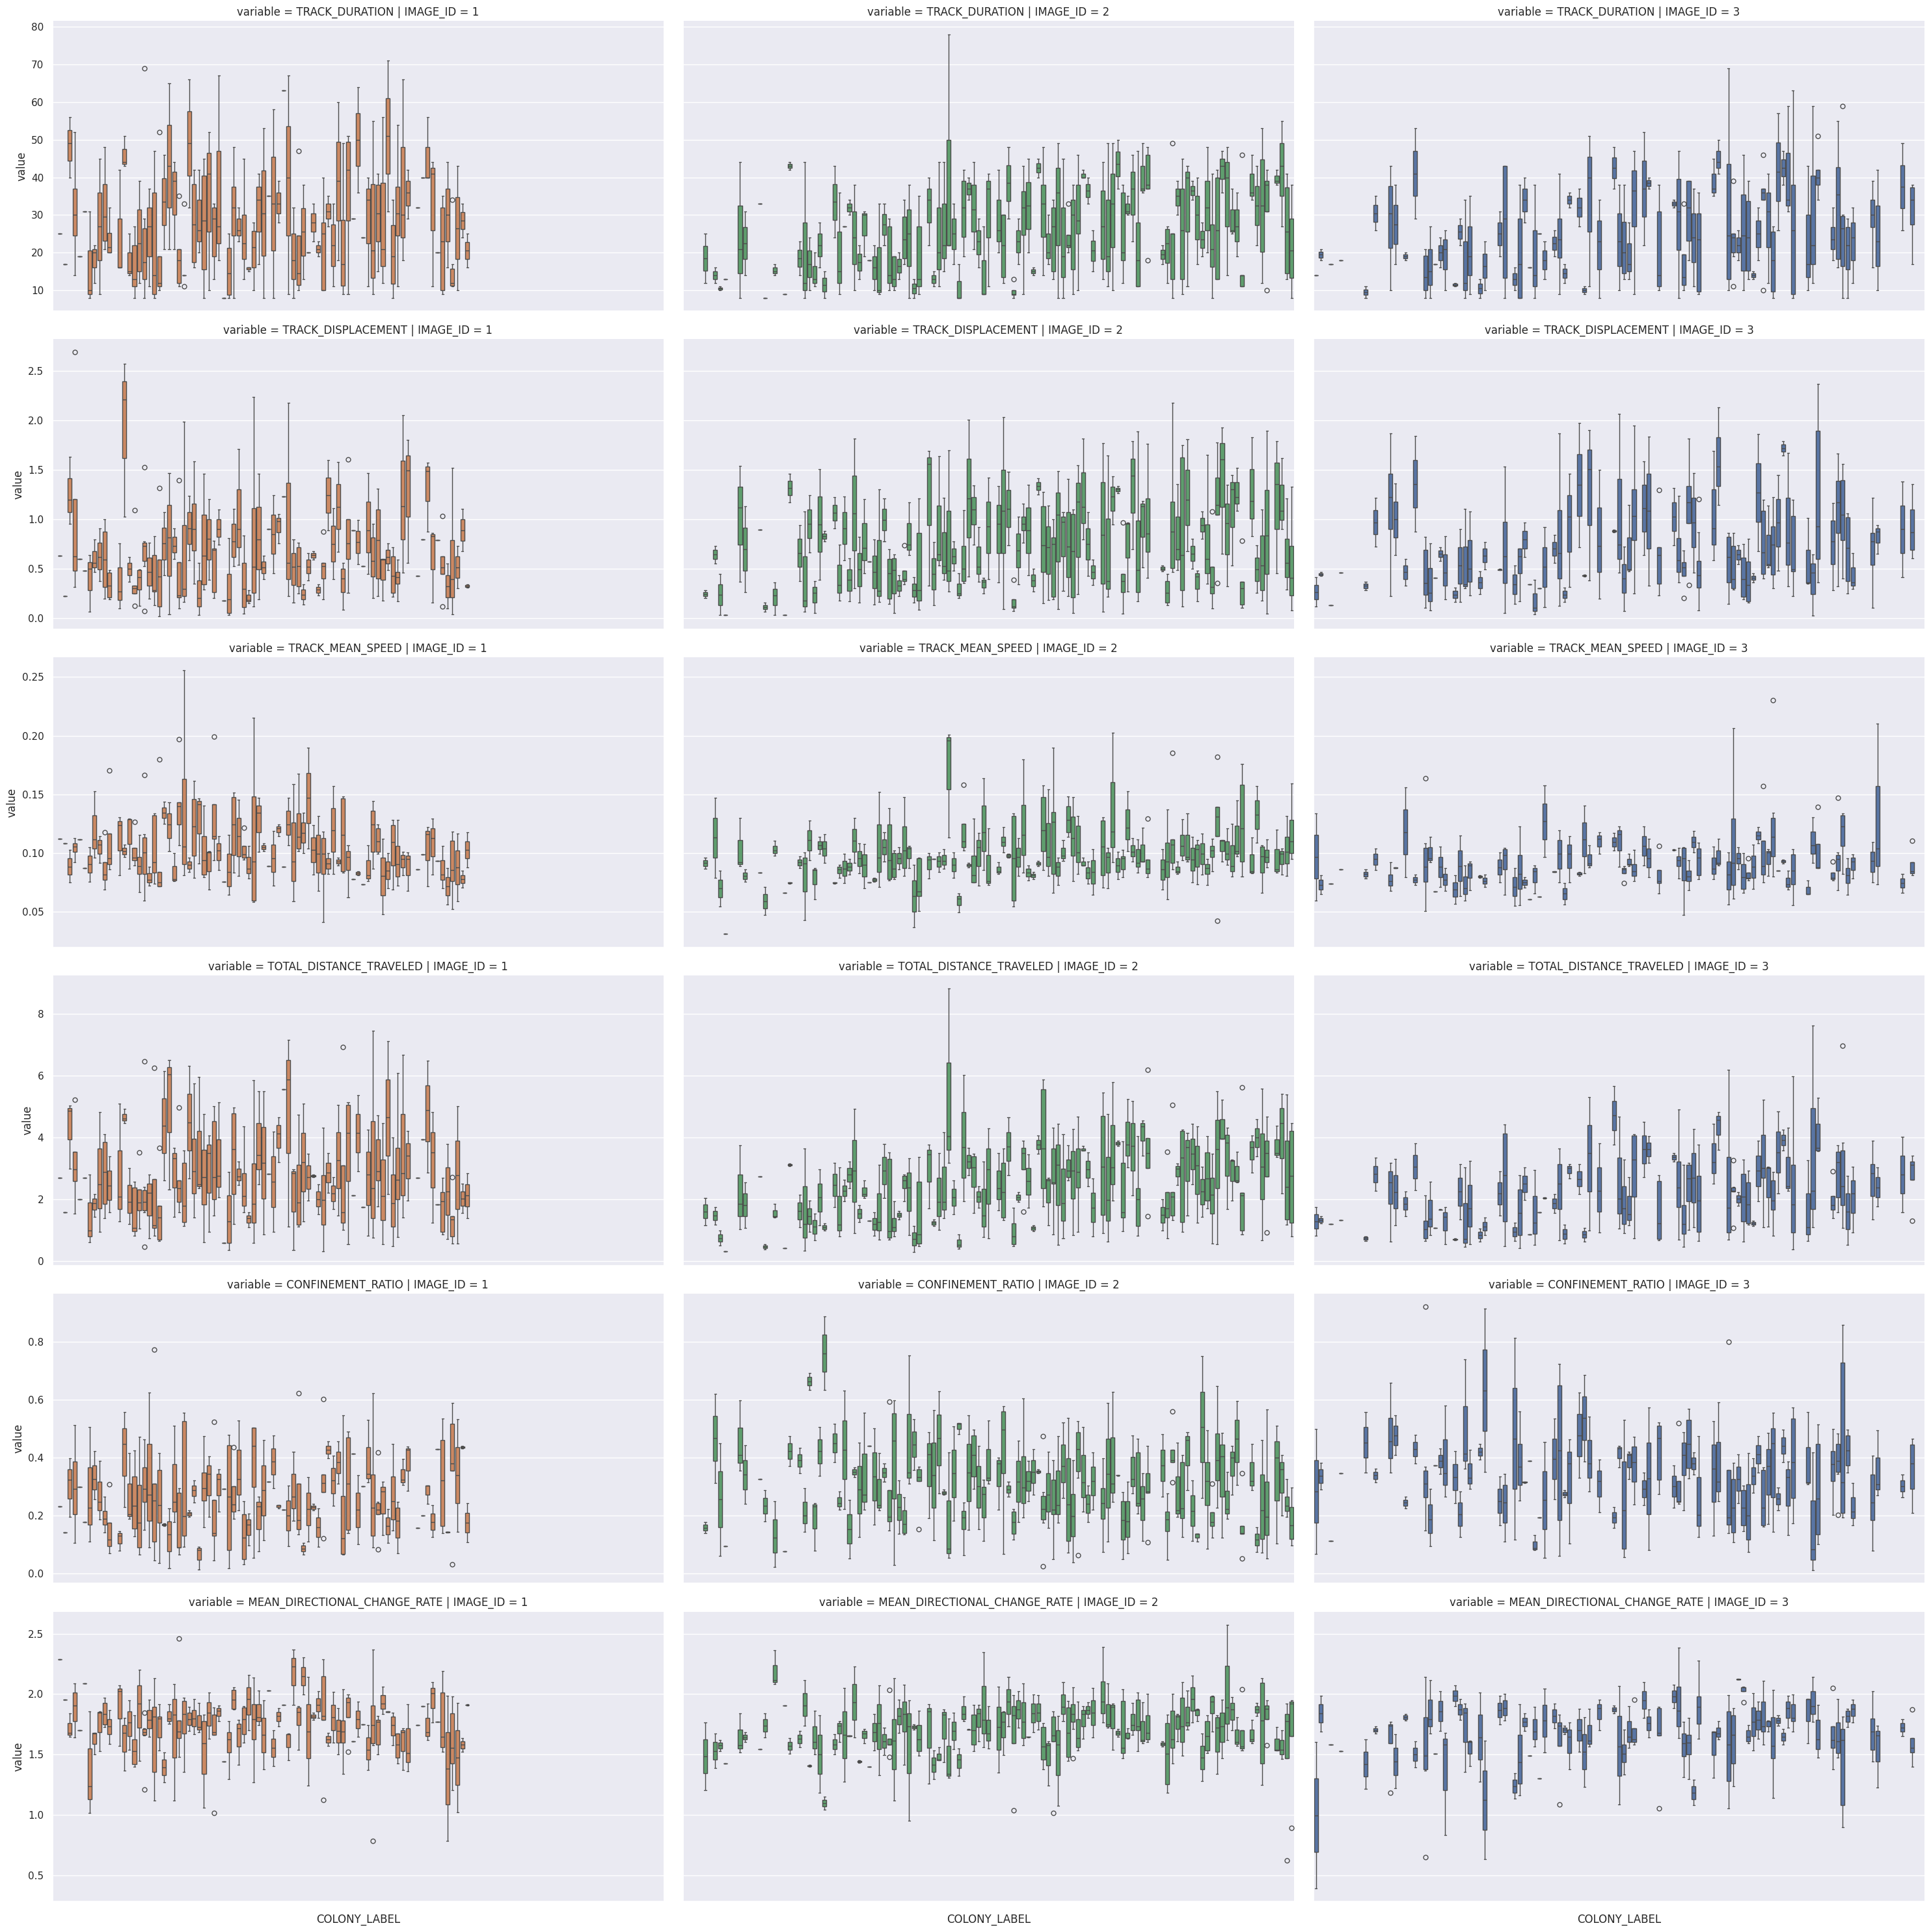

In [7]:
ax = sns.catplot(all_tracks_pivot, x="COLONY_LABEL", y="value", kind="box", hue="IMAGE_ID", row="variable", col="IMAGE_ID", sharey="row", height=5, aspect=2)
ax.set_xticklabels([])
ax.legend.set(visible=False)